In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Holdings

In [125]:
import pyarrow.parquet as pq

# Specify the path to your parquet.gzip file
parquet_file_path = 'data/holdings_sp500.parquet.gzip'

# Read the Parquet file using pyarrow
holdings = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame if needed
holdings = holdings.to_pandas()

holdings.head()

,date,mgrno,first_report,last_report,shares,permno,shares_adj,phrdate,pshares_adj,trade,...,askhi,bidlo,ret,shrout,yyyy-mm,gics,comnam,ticker,gics1,gics2
0,2021-06-30,110.0,False,False,3000.0,10104.0,3000.0,2021-03-31,3000.0,0.0,...,78.209999,77.580002,-0.003329,2792000.0,2021-06,45103020.0,ORACLE CORP,ORCL,Information Technology,Software & Services
1,2021-09-30,110.0,False,False,3000.0,10104.0,3000.0,2021-06-30,3000.0,0.0,...,91.580002,87.120003,-0.045151,2733686.0,2021-09,45103020.0,ORACLE CORP,ORCL,Information Technology,Software & Services
2,2021-12-31,110.0,False,False,3000.0,10104.0,3000.0,2021-09-30,3000.0,0.0,...,88.099998,87.180000,-0.009090,2670447.0,2021-12,45103020.0,ORACLE CORP,ORCL,Information Technology,Software & Services
3,2022-03-31,110.0,False,False,3000.0,10104.0,3000.0,2021-12-31,3000.0,0.0,...,83.910004,82.589996,-0.007558,2668157.0,2022-03,45103020.0,ORACLE CORP,ORCL,Information Technology,Software & Services
4,2022-06-30,110.0,False,False,3000.0,10104.0,3000.0,2022-03-31,3000.0,0.0,...,70.250000,68.209999,0.009536,2664926.0,2022-06,45103020.0,ORACLE CORP,ORCL,Information Technology,Software & Services


## number of institutions

In [126]:
institutions = holdings.groupby('year')['mgrno'].nunique()
institutions

year
2015    3637
2016    3794
2017    3934
2018    4332
2019    4616
2020    4939
2021    5455
2022    5904
Name: mgrno, dtype: int64

Text(0.5, 1.0, 'Number of Distinct Institutions')

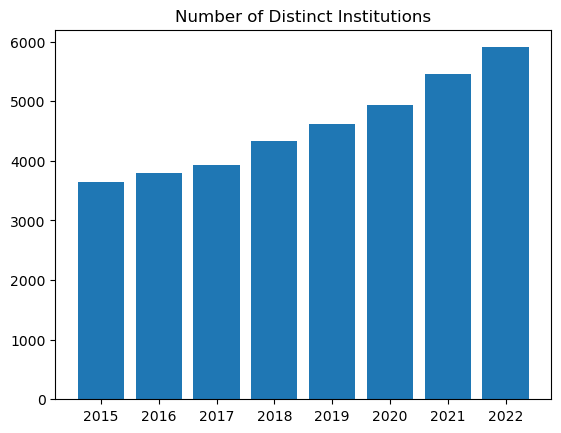

In [127]:
plt.bar(institutions.index, institutions)
plt.title('Number of Distinct Institutions')

## institution holding of shares

In [128]:
stks = holdings.groupby(['year', 'mgrno'])['permno'].nunique()
stks = stks.groupby('year').mean()

Text(0.5, 1.0, 'Average distinct stocks institutions hold')

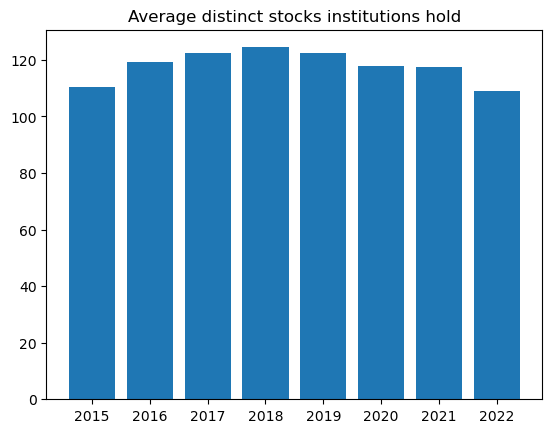

In [129]:
plt.bar(stks.index, stks)
plt.title('Average distinct stocks institutions hold')

In [130]:
recent_holdings = holdings[holdings['year']==2022]
recent_stks = recent_holdings.groupby(['mgrno'])['permno'].nunique()
recent_stks

mgrno
110.0       82
127.0       24
155.0        3
160.0       24
185.0      513
          ... 
93950.0     43
94230.0    256
94300.0    135
94500.0     44
95105.0     49
Name: permno, Length: 5904, dtype: int64

Text(0.5, 1.0, 'Distinct Stock Holdings Distribution for Institutions in 2022')

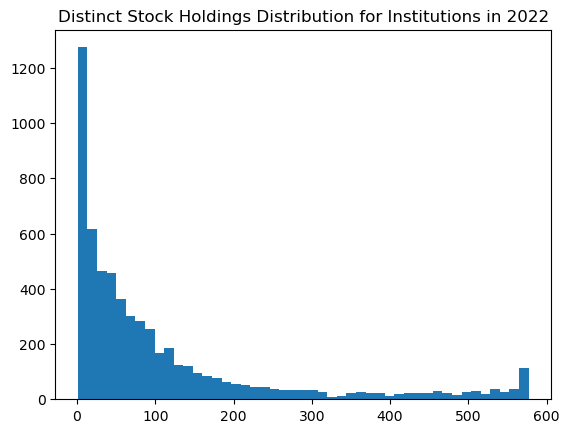

In [134]:
plt.hist(recent_stks, bins = 'auto')
plt.title('Distinct Stock Holdings Distribution for Institutions in 2022')

## number of instituions holding this stock

Text(0.5, 1.0, 'Average distinct institutions that hold a stock')

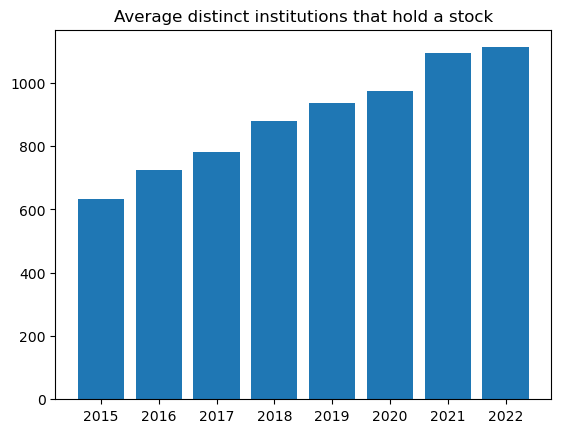

In [135]:
mgrno_holding_stocks = holdings.groupby(['year','permno'])['mgrno'].nunique()
mgrno_holding_stocks = mgrno_holding_stocks.groupby('year').mean()
plt.bar(mgrno_holding_stocks.index, mgrno_holding_stocks)
plt.title('Average distinct institutions that hold a stock')

In [136]:
stks = stks.groupby('year').mean()

# net flow

In [63]:
# Specify the path to your parquet.gzip file
parquet_file_path = 'data/hf_netflow.parquet.gzip'

# Read the Parquet file using pyarrow
net_flow = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame if needed
net_flow = net_flow.to_pandas()

net_flow.head()

,rdate,mgrno,mgrname,first_report,last_report,assets,pret,tbuys,tsales,tgain,tgainret,netflows,turnover1,turnover2,turnover3
0,2015-03-31,110.0,"AR ASSET MANAGEMENT, INC.",False,False,230.559108,-0.000580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-30,110.0,"AR ASSET MANAGEMENT, INC.",False,False,226.166607,-0.077177,220.872751,0.000000,-17.778290,-0.080491,-4.258772,0.000000,0.018471,0.939516
2,2015-09-30,110.0,"AR ASSET MANAGEMENT, INC.",False,False,206.563771,0.031058,8.114555,5.910309,-0.986499,-0.070339,-2.148021,0.027316,0.035630,0.052514
3,2015-12-31,110.0,"AR ASSET MANAGEMENT, INC.",False,False,203.341691,0.037110,5.266832,8.467398,-0.931106,-0.067795,-9.637487,0.025698,0.072154,0.019833
4,2016-03-31,110.0,"AR ASSET MANAGEMENT, INC.",False,False,214.631618,0.042093,7.935235,2.598843,0.324678,0.030822,3.743941,0.012435,0.031193,0.033393


## map institutions, get top 10 names

In [138]:
top10_recent_stks =  recent_stks[recent_stks.nlargest(10).index]

In [139]:
mgr_map = net_flow.drop_duplicates(subset='mgrno')
mgr_map = mgr_map[mgr_map['mgrno'].isin(top10_recent_stks.index)]
mgr_map

,rdate,mgrno,mgrname,first_report,last_report,assets,pret,tbuys,tsales,tgain,tgainret,netflows,turnover1,turnover2,turnover3,year
9814,2015-03-31,7800.0,DEUTSCHE BK AKTIENGESELLSCHAFT,False,False,1.366017e+05,-0.002973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
16302,2015-03-31,8775.0,CUBIST SYSTEMATIC STRATEGIES L,False,False,1.822259e+03,0.000582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
28193,2018-03-31,9375.0,BARCLAYS BANK PLC,False,False,4.447567e+04,0.035879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
28344,2015-03-31,9385.0,BLACKROCK INC,False,False,1.107465e+06,-0.002843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
33132,2015-03-31,10039.0,"GEODE CAPITAL MGMT, L.L.C.",False,False,1.617468e+05,0.003791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
37169,2015-03-31,10404.0,"SG AMERICAS SECURITIES, LLC",False,False,1.420997e+04,0.003172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
39599,2015-03-31,10586.0,AMVESCAP PLC LONDON,False,False,2.346441e+05,0.001697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
40588,2015-03-31,10719.0,ROYAL BANK OF CANADA,False,False,2.422902e+04,-0.004074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
40867,2015-03-31,10736.0,"JANE STR HOLDING, LLC",False,False,5.484280e+03,0.004216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
51954,2015-03-31,11800.0,CREDIT SUISSE SECS (USA) LLC,False,False,8.080182e+04,0.004897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


## held value

In [80]:
net_flow['year'] = net_flow['rdate'].dt.year
recent_net_flow = net_flow[net_flow['year']==2022]
recent_net_flow.head()

,rdate,mgrno,mgrname,first_report,last_report,assets,pret,tbuys,tsales,tgain,tgainret,netflows,turnover1,turnover2,turnover3,year
28,2022-03-31,110.0,"AR ASSET MANAGEMENT, INC.",False,False,378.883709,-0.117205,6.968764,1.550537,-0.411036,-0.048248,5.222313,0.004109,0.018020,0.008772,2022
29,2022-06-30,110.0,"AR ASSET MANAGEMENT, INC.",False,False,337.940799,-0.055062,6.717828,0.570962,0.320701,0.043999,3.464036,0.001593,0.010650,0.010095,2022
30,2022-09-30,110.0,"AR ASSET MANAGEMENT, INC.",False,False,318.628230,0.122763,5.628877,2.000557,0.722348,0.094679,-0.705009,0.006094,0.008006,0.020490,2022
58,2022-03-31,127.0,"AEW CAPITAL MANAGEMENT, L.P.",False,False,3443.257012,-0.185645,190.557238,406.021428,9.808312,0.016441,-228.624531,0.052366,0.109316,0.095957,2022
59,2022-06-30,127.0,"AEW CAPITAL MANAGEMENT, L.P.",False,False,2660.282252,-0.093528,415.902655,606.302827,-0.103016,-0.000101,-143.751837,0.136282,0.162536,0.255123,2022


In [102]:
held_value = recent_net_flow.groupby('mgrno')['assets'].mean()
log_held_value = np.log(held_value)
log_held_value

mgrno
110.0      5.843982
127.0      7.968232
155.0      6.477776
160.0      7.444930
180.0      6.501507
             ...   
94230.0    8.805569
94280.0    4.510506
94300.0    7.452462
94500.0    8.053815
95105.0    6.282290
Name: assets, Length: 6817, dtype: float64

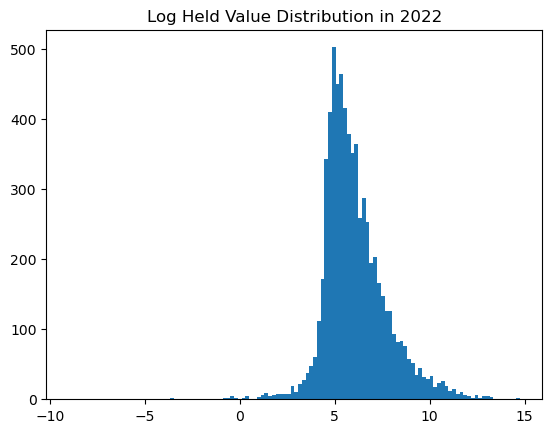

In [103]:
plt.hist(log_held_value, bins = 'auto')
plt.title('Log Held Value Distribution in 2022')
plt.show()

## netflows

In [105]:
net_flows = recent_net_flow.groupby('mgrno')['netflows'].mean()
pos_net_flows = net_flows[net_flows>0]
neg_net_flows = net_flows[net_flows<0]

In [106]:
log_pos_net_flows = np.log(pos_net_flows)
log_neg_net_flows = np.log(-neg_net_flows)

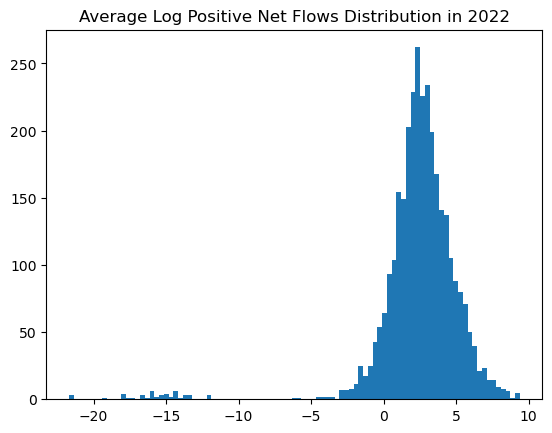

In [107]:
plt.hist(log_pos_net_flows, bins = 'auto')
plt.title('Average Log Positive Net Flows Distribution in 2022')
plt.show()

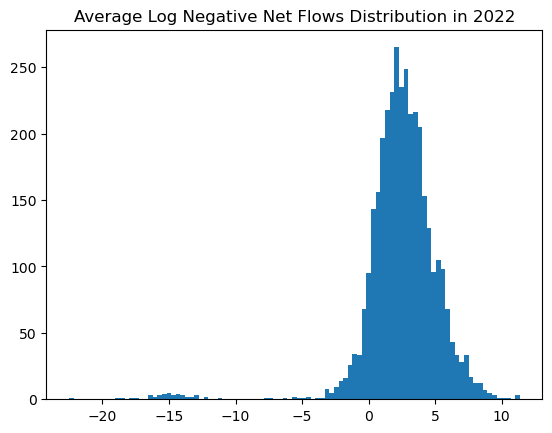

In [108]:
plt.hist(log_neg_net_flows, bins = 'auto')
plt.title('Average Log Negative Net Flows Distribution in 2022')
plt.show()

## tgainret

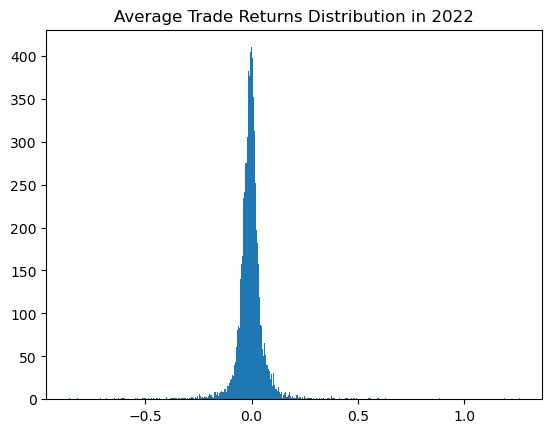

In [113]:
tgainret = recent_net_flow.groupby('mgrno')['tgainret'].mean()
plt.hist(tgainret, bins = 'auto')
plt.title('Average Trade Returns Distribution in 2022')
plt.show()

In [114]:
log_pos_tgainret = np.log(tgainret[tgainret>0])
log_neg_tgainret = np.log(-tgainret[tgainret<0])

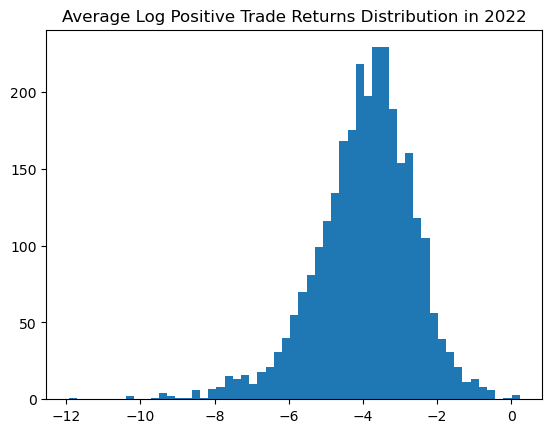

In [117]:
plt.hist(log_pos_tgainret, bins = 'auto')
plt.title('Average Log Positive Trade Returns Distribution in 2022')
plt.show()

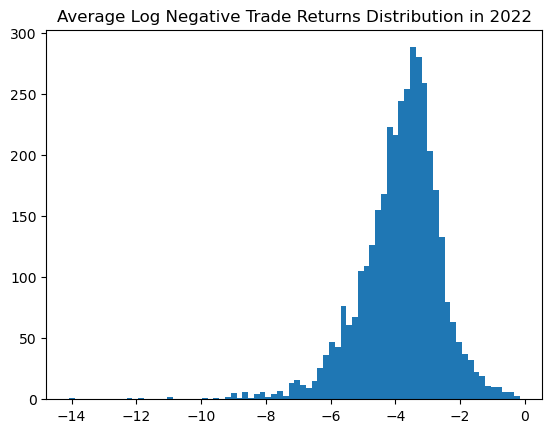

In [116]:
plt.hist(log_neg_tgainret, bins = 'auto')
plt.title('Average Log Negative Trade Returns Distribution in 2022')
plt.show()

## buy & sell

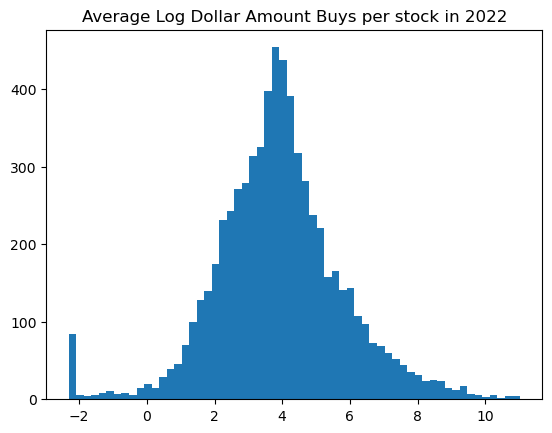

In [122]:
tbuys = np.log(0.1+recent_net_flow.groupby('mgrno')['tbuys'].mean())
plt.hist(tbuys, bins = 'auto')
plt.title('Average Log Dollar Amount Buys per stock in 2022')
plt.show()

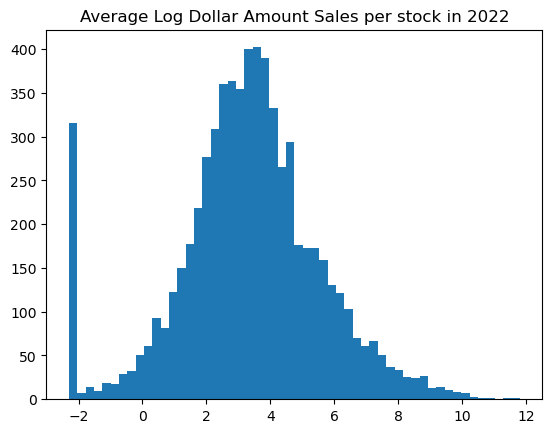

In [123]:
tsales = np.log(0.1+recent_net_flow.groupby('mgrno')['tsales'].mean())
plt.hist(tsales, bins = 'auto')
plt.title('Average Log Dollar Amount Sales per stock in 2022')
plt.show()